In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '15'

In [2]:
import pandas as pd
import numpy as np 

/tmp/ipykernel_28892/3482817184.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
dataset = pd.read_csv('ml-latest-small/ratings.csv')

In [4]:
dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
dataset.shape

(100836, 4)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [8]:
train.head()

,userId,movieId,rating,timestamp
80568,509,7347,3.0,1435994597
50582,326,71462,4.0,1322252335
8344,57,2115,3.0,965798155
99603,610,1127,4.0,1479544102
71701,462,2409,2.0,1174438249


In [9]:
u_users = len(dataset.userId.unique())
n_movies = len(dataset.movieId.unique())

In [10]:
from tensorflow import keras
from keras.layers import Input, Embedding, Flatten, Dot, GlobalAveragePooling1D, Dense, Dropout, Concatenate
from keras import Model

In [11]:
movie_input = Input(shape=[1], name='Movie-Input')
movie_embedding = Embedding(n_movies+1, 5, name='Movie-Embedding')(movie_input)
movie_vec = Dense(32, activation='relu')(movie_embedding)
movie_vec = Dense(64, activation='relu')(movie_vec)


user_input = Input(shape=[1], name='User-Input')
user_embedding = Embedding(u_users+1, 5, name='User-Embedding')(user_input)
user_vec = Dense(32, activation='relu')(user_embedding)
user_vec = Dense(64, activation='relu')(user_vec)


prod = Concatenate(name='Concatenate-Product')([movie_vec, user_vec])
prod = Dense(128, activation='relu')(prod)
prod = Dense(1)(prod)
prod = GlobalAveragePooling1D()(prod)

model = Model([user_input, movie_input], prod)

In [12]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001) , loss='mean_squared_error')

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Movie-Input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 User-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Movie-Embedding (Embedding  (None, 1, 5)                 48625     ['Movie-Input[0][0]']         
 )                                                                                                
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 3055      ['User-Input[0][0]']      

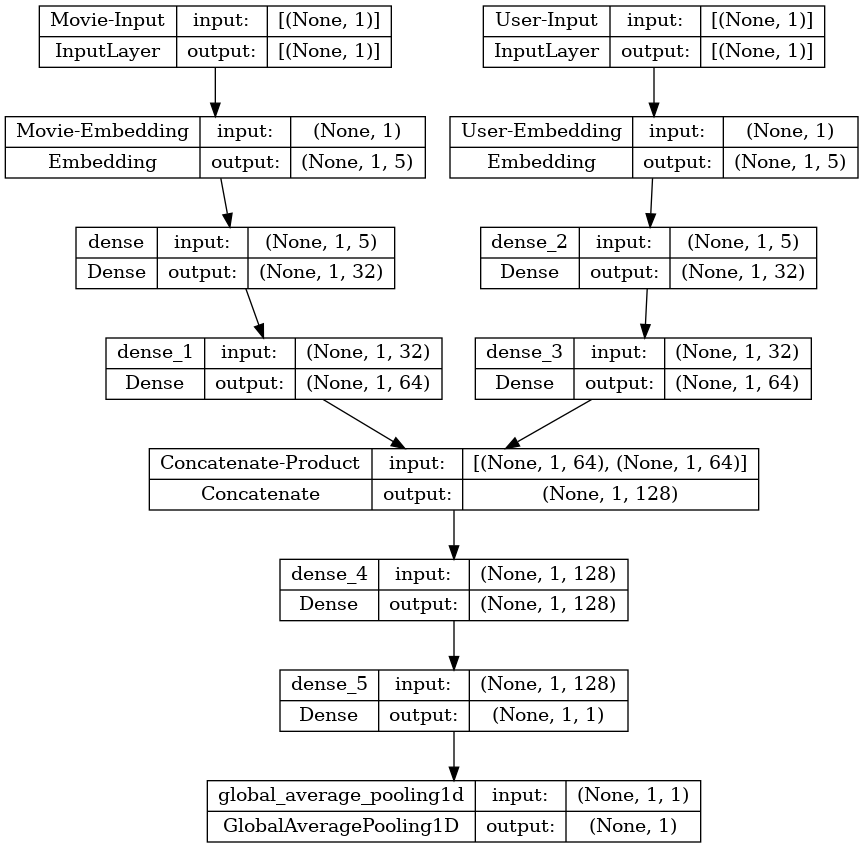

In [14]:
keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.evaluate([test.userId, test.movieId], test.rating)

631/631 [==============================] - 2s 1ms/step - loss: 13.3080


13.307981491088867

In [16]:
predictions = model.predict([test.userId.head(10), test.movieId.head(10)])
for i in range(0, 10):
    print(predictions[i], test.rating.iloc[i])

1/1 [==============================] - 0s 176ms/step
[0.00068779] 4.5
[0.0092568] 3.0
[-3.7368387e-05] 3.0
[0.00494144] 4.0
[0.00360036] 4.0
[0.00767868] 4.0
[-0.00345139] 3.5
[0.00275283] 4.5
[0.00177869] 0.5
[-6.6319946e-05] 3.5


In [17]:
from keras.models import load_model
import os
import matplotlib.pyplot as plt 

In [18]:
if os.path.exists('user249_model.h5'):
    model = load_model('user249_model.h5')
else:
    history = model.fit([train.userId, train.movieId], train.rating , validation_data=([test.userId, test.movieId], test.rating), epochs=8, verbose=1)
    model.0.7754save('user249_model.h5')

Epoch 1/8


I0000 00:00:1715100358.393734   28972 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2521/2521 [==============================] - 12s 4ms/step - loss: 0.9538 - val_loss: 0.8292
Epoch 2/8
2521/2521 [==============================] - 8s 3ms/step - loss: 0.7634 - val_loss: 0.7940
Epoch 3/8
2521/2521 [==============================] - 8s 3ms/step - loss: 0.7459 - val_loss: 0.7931
Epoch 4/8
2521/2521 [==============================] - 8s 3ms/step - loss: 0.7346 - val_loss: 0.7941
Epoch 5/8
2521/2521 [==============================] - 8s 3ms/step - loss: 0.7245 - val_loss: 0.7909
Epoch 6/8
2521/2521 [==============================] - 8s 3ms/step - loss: 0.7103 - val_loss: 0.7723
Epoch 7/8
2521/2521 [==============================] - 8s 3ms/step - loss: 0.6977 - val_loss: 0.7749
Epoch 8/8
2521/2521 [==============================] - 8s 3ms/step - loss: 0.6878 - val_loss: 0.7754


/home/syydmr/miniconda3/envs/tf15/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


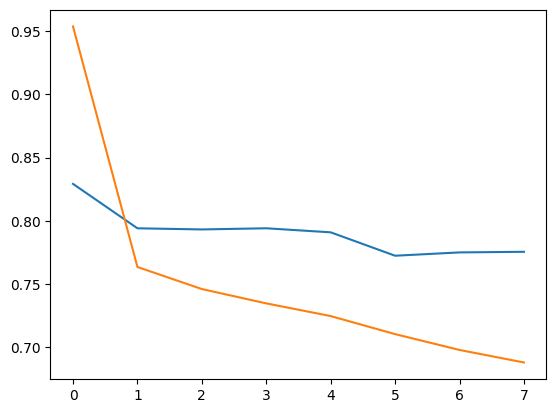

In [19]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [44]:
filtered_rows = dataset[dataset['userId'] == 249]
print(len(filtered_rows))

1046


In [40]:
filtered_rows.movieId

36374         1
36375         2
36376        19
36377        20
36378        32
          ...  
37415    184015
37416    184253
37417    185029
37418    185435
37419    187593
Name: movieId, Length: 1046, dtype: int64

In [41]:
predictions = model.predict([filtered_rows.userId, filtered_rows.movieId])

for i in range(len(filtered_rows.userId)):
    print(predictions[i], filtered_rows.rating.iloc[i])

33/33 [==============================] - 0s 1ms/step
[4.109641] 4.0
[3.512492] 4.0
[2.927555] 3.5
[2.9393907] 3.5
[4.1931677] 5.0
[4.116638] 5.0
[3.1557937] 3.0
[4.356216] 4.0
[3.6464753] 4.0
[3.2780108] 3.5
[4.026866] 3.0
[3.530159] 3.5
[4.122589] 5.0
[4.2463174] 4.5
[2.808906] 3.0
[3.484764] 4.0
[3.9400854] 2.5
[3.8231592] 4.0
[2.9822884] 3.0
[3.0343516] 3.5
[3.7950072] 4.0
[4.4653516] 5.0
[2.9431977] 3.5
[4.210704] 5.0
[4.4918747] 4.0
[4.614104] 4.5
[3.2532742] 3.5
[4.337088] 4.5
[4.0096083] 5.0
[3.3007424] 4.0
[3.6912851] 3.5
[3.6348336] 4.0
[3.6222029] 4.0
[2.9256046] 3.5
[4.0119476] 3.5
[3.077799] 3.5
[3.0783005] 3.5
[4.1097994] 4.5
[3.948491] 4.0
[3.309843] 3.5
[3.0678728] 3.0
[3.4916003] 3.5
[3.573297] 4.0
[4.395892] 4.5
[4.258561] 4.0
[4.0103188] 4.0
[4.1018085] 4.0
[4.315188] 4.0
[3.966482] 4.0
[4.2933793] 4.5
[3.5410242] 3.5
[2.9517267] 3.0
[3.7012217] 4.0
[3.3575578] 3.0
[4.4975467] 4.0
[4.2722573] 4.5
[3.5423384] 4.0
[3.315631] 3.5
[2.6384377] 3.5
[4.4576273] 4.5
[4.085481

In [42]:
predictions

array([[4.109641],
       [3.512492],
       [2.927555],
       ...,
       [3.680944],
       [3.680944],
       [3.680944]], dtype=float32)